#  Q1. Local Color Correction

### 1.

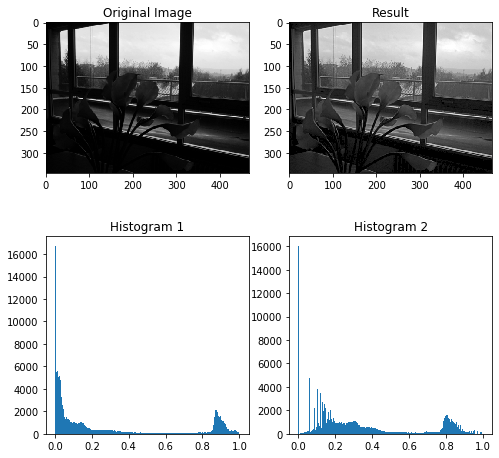

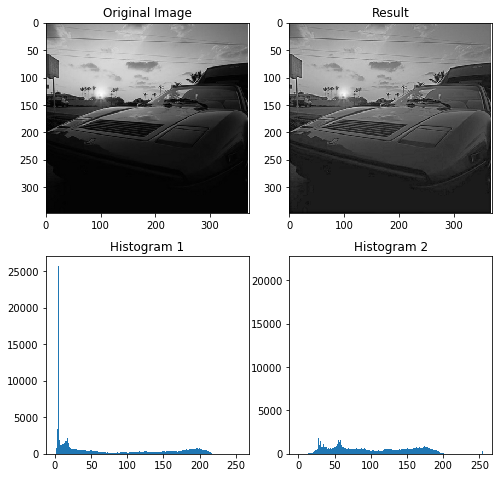

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def Q1_NVG(image,choix):
    if choix==1:
        # Reading the image
        I=cv2.imread(image)/255
        b,g,r=cv2.split(I)
        I=cv2.merge((r,g,b))
        I=np.mean(I,2)
        sigma=2

        DFT2d_I=np.fft.fft2(I)

        #Calculate the gaussian 
        sigma=2
        [M,N]=I.shape
        Nr = np.fft.ifftshift(np.arange(-np.fix(M/2),np.ceil(M/2)))
        Nc = np.fft.ifftshift(np.arange(-np.fix(N/2),np.ceil(N/2)))

        [Nc,Nr] = np.meshgrid(Nc,Nr)
        dft_gauss_kernel=np.exp(-2*(sigma**2)*(np.pi**2)*((Nr/M)**2+(Nc/N)**2)) 

        DFT2d_I_convolved=np.multiply(DFT2d_I,dft_gauss_kernel)
        I_convolved=np.fft.ifft2(DFT2d_I_convolved)
        MI=np.real(I_convolved)

        output=np.zeros((M,N))
        for i in range(M):
            for j in range(N):
                output[i,j]=(I[i,j])**(2**(2*MI[i,j]-1))


        plt.figure(figsize=(8,8)) 
        plt.subplot(2,2,1) 
        plt.imshow(I,cmap="gray")
        plt.title('Original Image')
        plt.subplot(2,2,2)
        plt.imshow(output,cmap="gray")
        plt.title('Result')
        plt.subplot(2,2,3)
        plt.hist(I.ravel(),256,[0,1])
        plt.title('Histogram 1')
        plt.subplot(2,2,4)
        plt.hist(output.ravel(),256,[0,1])
        plt.title('Histogram 2')
        plt.show()
        
    else:
        # Reading the image
        I=cv2.imread(image)
        b,g,r=cv2.split(I)
        I=cv2.merge((r,g,b))
        I=np.mean(I,2)


        Inv=255-I
        DFT2d_I=np.fft.fft2(Inv)

        #Calculate the gaussian 
        sigma=2
        [M,N]=I.shape
        Nr = np.fft.ifftshift(np.arange(-np.fix(M/2),np.ceil(M/2)))
        Nc = np.fft.ifftshift(np.arange(-np.fix(N/2),np.ceil(N/2)))

        [Nc,Nr] = np.meshgrid(Nc,Nr)
        dft_gauss_kernel=np.exp(-2*(sigma**2)*(np.pi**2)*((Nr/M)**2+(Nc/N)**2))

        DFT2d_I_convolved=np.multiply(DFT2d_I,dft_gauss_kernel)
        I_convolved=np.fft.ifft2(DFT2d_I_convolved)
        MI=np.real(I_convolved)

        output=np.zeros((M,N))
        for i in range(M):
            for j in range(N):
                output[i,j]=255.0*((I[i,j]/255.0)**(2.0**((128.0-MI[i,j])/128.0)))


        plt.figure(figsize=(8,8)) 
        plt.subplot(2,2,1) 
        plt.imshow(I,cmap="gray")
        plt.title('Original Image')
        plt.subplot(2,2,2)
        plt.imshow(output,cmap="gray")
        plt.title('Result')
        plt.subplot(2,2,3)
        plt.hist(I.ravel(),256,[0,255])
        plt.title('Histogram 1')
        plt.subplot(2,2,4)
        plt.hist(output.ravel(),256,[0,255])
        plt.title('Histogram 2')
        plt.show()
        

Q1_NVG('input_1.PNG',1)
Q1_NVG('input_2.PNG',0)

### 2. RGBLLC

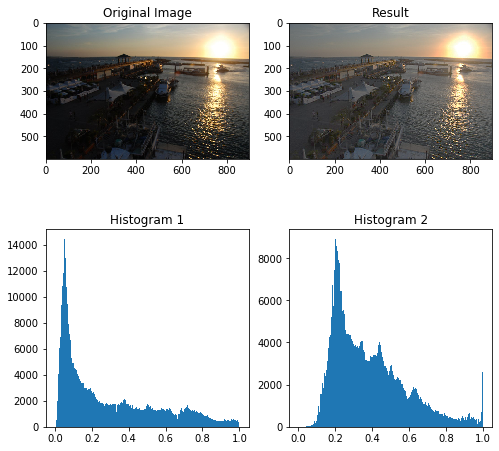

In [5]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

def Q2_RGBLCC(image):
    
    # Reading the image
    I=cv2.imread(image)/255

    # Extract the three color chanels
    b,g,r=cv2.split(I)
    I=cv2.merge((r,g,b))

    #Calculating the fft of the chanels
    DFT2d_r=np.fft.fft2(r)
    DFT2d_g=np.fft.fft2(g)
    DFT2d_b=np.fft.fft2(b)
    [M,N,C]=I.shape

    #Calculate the gaussian 
    sigma=2;
    Nr = np.fft.ifftshift(np.arange(-np.fix(M/2),np.ceil(M/2)))
    Nc = np.fft.ifftshift(np.arange(-np.fix(N/2),np.ceil(N/2)))

    [Nc,Nr] = np.meshgrid(Nc,Nr)
    dft_gauss_kernel=np.exp(-2*(sigma**2)*(np.pi**2)*((Nr/M)**2+(Nc/N)**2))

    #Convolution of both ffts
    import numpy.matlib
    DFT2d_r_convolved=np.multiply(DFT2d_r,dft_gauss_kernel)
    DFT2d_g_convolved=np.multiply(DFT2d_g,dft_gauss_kernel)
    DFT2d_b_convolved=np.multiply(DFT2d_b,dft_gauss_kernel)

     # calculate the inverse, choosing only the real values of each chanel
    r_convolved=np.fft.ifft2(DFT2d_r_convolved)
    MRed=np.real(r_convolved)

    g_convolved=np.fft.ifft2(DFT2d_g_convolved)
    MGreen=np.real(g_convolved)

    b_convolved=np.fft.ifft2(DFT2d_b_convolved)
    MBlue=np.real(b_convolved)

    output=np.zeros((M,N,3))

     # Application of LLC
    output=np.zeros((M,N,3))
    for i in range(M):
        for j in range(N):
            output[i,j,0]=(r[i,j])**(2**(2*MRed[i,j]-1))
            output[i,j,1]=(g[i,j])**(2**(2*MGreen[i,j]-1))
            output[i,j,2]=(b[i,j])**(2**(2*MBlue[i,j]-1))

    # plt.imshow(output)
    # plt.title("Result")
    # plt.show()
    plt.figure(figsize=(8,8)) 
    plt.subplot(2,2,1) 
    plt.imshow(I),
    plt.title('Original Image')
    plt.subplot(2,2,2)
    plt.imshow(output)
    plt.title('Result')
    plt.subplot(2,2,3)
    plt.hist(np.mean(I,2).ravel(),256,[0,1])
    plt.title('Histogram 1')
    plt.subplot(2,2,4)
    plt.hist(np.mean(output,2).ravel(),256,[0,1])
    plt.title('Histogram 2')
    plt.show()

Q2_RGBLCC('input_3.jpg')

### 3. HSILCC

/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in greater_equal
/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in less
/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in greater_equal
/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in less
/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in greater_equal
/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipyker

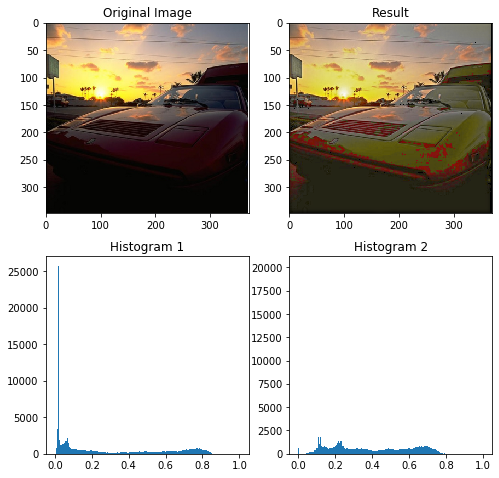

In [201]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Reading the image
I=cv2.imread('input_2.PNG')/255

# Extract the three color chanels
b,g,r=cv2.split(I)
I=cv2.merge((r,g,b))
# plt.imshow(I)
# plt.title('Original')
# plt.show()


def rgb2hsi(r1,g1,b1):
    with np.errstate(divide='ignore'):
        theta = np.arccos((((r1-g1) + (r1-b1))/2)/np.sqrt((r1-g1)*(r1-g1) + (r1-b1)*(g1-b1)))
    
    h = np.where(b1<=g1, theta, (2*np.pi)-theta)
    s = 1 - (np.minimum(np.minimum(r1,g1),b1)*3)/(r1+g1+b1)
    i = (r1+g1+b1)/3
    return h,s,i

h,s,i = rgb2hsi(r,g,b)
hsi=cv2.merge((np.clip(h,0,1),np.clip(s,0,1),np.clip(i,0,1)))
# plt.imshow(hsi)
# plt.title('HSI Image')
# plt.show()

#We put Value=Intensity of the image in the following
Value=hsi[:,:,2]

#Calculate the fft of the Intensity (Value)
DFT2d_Value=np.fft.fft2(Value)
        
#Calculate the Gaussian
[M , N]=Value.shape
sigma=4
Nr = np.fft.ifftshift(np.arange(-np.fix(M/2),np.ceil(M/2)))
Nc = np.fft.ifftshift(np.arange(-np.fix(N/2),np.ceil(N/2)))

[Nc,Nr] = np.meshgrid(Nc,Nr)
dft_gauss_kernel=np.exp(-2*(sigma**2)*(np.pi**2)*((Nr/M)**2+(Nc/N)**2))
        
#Convolution of the Gaussian_fft and the intesity_fft
DFT2d_Value_convolved=np.multiply(DFT2d_Value,dft_gauss_kernel)

#Calculate the inverse, and take the real values
Value_convolved=np.fft.ifft2(DFT2d_Value_convolved)
MValue=np.real(Value_convolved)

#Application of the LCC formula
output=np.zeros((M,N,3))
for i in range(M):
    for j in range(N):
        output[i,j,2]=(Value[i,j])**(2**(2*MValue[i,j]-1))
        
#Output will have the same Hue and Saturation values, and we change the intensity
output[:,:,1]=hsi[:,:,1]
output[:,:,0]=hsi[:,:,0]

def hsi2rgb(h,s,i):
    r = np.zeros(h.shape) 
    g = np.zeros(h.shape)
    b = np.zeros(h.shape)
    
    c1 = np.argwhere((h>=0) & (h<((2*np.pi)/3)))
    for x,y in c1:
        r[x,y] = i[x,y] * (1 + (s[x,y]*np.cos(h[x,y])/np.cos((np.pi/3)-h[x,y])))
        b[x,y] = i[x,y]*(1-s[x,y])
        g[x,y] = 3*i[x,y] - (r[x,y]+b[x,y])
        
    c1 = np.argwhere((h>=((2*np.pi)/3)) & (h<((4*np.pi)/3)))
    for x,y in c1:
        h1 = h[x,y] - ((2*np.pi)/3)
        g[x,y] = i[x,y] * (1 + (s[x,y]*np.cos(h1)/np.cos((np.pi/3)-h1)))
        r[x,y] = i[x,y]*(1-s[x,y])
        b[x,y] = 3*i[x,y] - (r[x,y]+b[x,y])
        
    c1 = np.argwhere((h>=((4*np.pi)/3)) & (h<(2*np.pi)))
    for x,y in c1:
        h1 = h[x,y] - ((4*np.pi)/3)
        b[x,y] = i[x,y] * (1 + (s[x,y]*np.cos(h1)/np.cos((np.pi/3)-h1)))
        g[x,y] = i[x,y]*(1-s[x,y])
        r[x,y] = 3*i[x,y] - (r[x,y]+b[x,y])
    
    return r,g,b

h,s,i=cv2.split(output)
r,g,b = hsi2rgb(h,s,i)
img_rgb1=cv2.merge((np.clip(r,0,1),np.clip(g,0,1),np.clip(b,0,1)))
# plt.imshow(img_rgb1)
# plt.title('Result')
# plt.show()

plt.figure(figsize=(8,8)) 
plt.subplot(2,2,1) 
plt.imshow(I)
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(img_rgb1)
plt.title('Result')
plt.subplot(2,2,3)
plt.hist(np.mean(I,2).ravel(),256,[0,1])
plt.title('Histogram 1')
plt.subplot(2,2,4)
plt.hist(np.mean(img_rgb1,2).ravel(),256,[0,1])
plt.title('Histogram 2')
plt.show()

### 4. HSVLCC

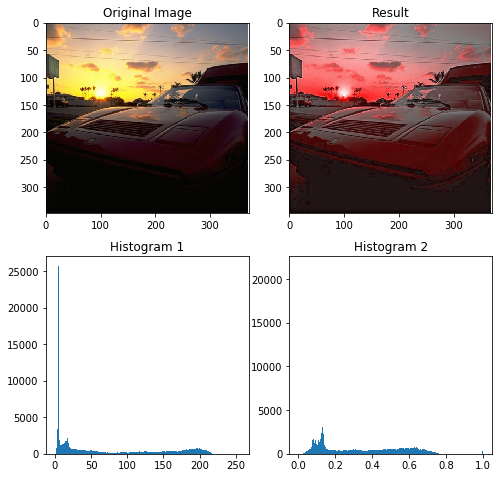

In [197]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Reading the image
I=cv2.imread('input_2.PNG')

# Extract the three color chanels
b,g,r=cv2.split(I)
I=cv2.merge((r,g,b))

hsv = cv2.cvtColor(I, cv2.COLOR_RGB2HSV)

#We put Value=Intensity of the image in the following
Value=hsv[:,:,2]/255

#Calculate the fft of the Intensity (Value)
DFT2d_Value=np.fft.fft2(Value)
        
#Calculate the Gaussian
[M , N]=Value.shape
sigma=4
Nr = np.fft.ifftshift(np.arange(-np.fix(M/2),np.ceil(M/2)))
Nc = np.fft.ifftshift(np.arange(-np.fix(N/2),np.ceil(N/2)))

[Nc,Nr] = np.meshgrid(Nc,Nr)
dft_gauss_kernel=np.exp(-2*(sigma**2)*(np.pi**2)*((Nr/M)**2+(Nc/N)**2))
        
#Convolution of the Gaussian_fft and the intesity_fft
DFT2d_Value_convolved=np.multiply(DFT2d_Value,dft_gauss_kernel)

#Calculate the inverse, and take the real values
Value_convolved=np.fft.ifft2(DFT2d_Value_convolved)
MValue=np.real(Value_convolved)

#Application of the LCC formula
output=np.zeros((M,N,3))
for i in range(M):
    for j in range(N):
        output[i,j,2]=(Value[i,j])**(2**(2*MValue[i,j]-1))
        
#Output will have the same Hue and Saturation values, and we change the intensity
output[:,:,1]=hsv[:,:,1]/255
output[:,:,0]=hsv[:,:,0]/255

img_rgb1= cv2.cvtColor(np.float32(output), cv2.COLOR_HSV2RGB)

plt.figure(figsize=(8,8)) 
plt.subplot(2,2,1) 
plt.imshow(I)
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(img_rgb1)
plt.title('Result')
plt.subplot(2,2,3)
plt.hist(np.mean(I,2).ravel(),256,[0,255])
plt.title('Histogram 1')
plt.subplot(2,2,4)
plt.hist(np.mean(img_rgb1,2).ravel(),256,[0,1])
plt.title('Histogram 2')
plt.show()

### 5. HSLLCC

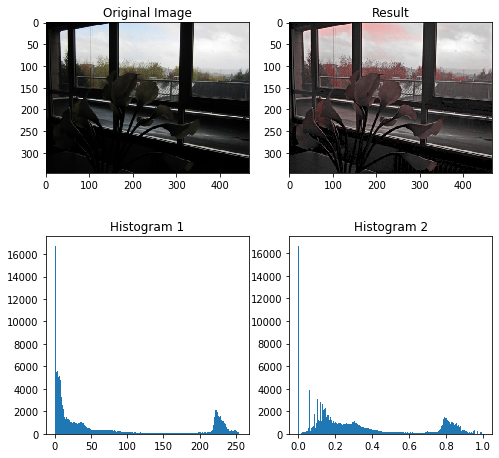

In [200]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Reading the image
I=cv2.imread('input_1.PNG')

# Extract the three color chanels
b,g,r=cv2.split(I)
I=cv2.merge((r,g,b))

hls = cv2.cvtColor(I, cv2.COLOR_RGB2HLS)

#We Lum of the image in the following
Lum=hls[:,:,1]/255

#Calculate the fft of the Lum
DFT2d_Lum=np.fft.fft2(Lum)
        
#Calculate the Gaussian
[M , N]=Lum.shape
sigma=4
Nr = np.fft.ifftshift(np.arange(-np.fix(M/2),np.ceil(M/2)))
Nc = np.fft.ifftshift(np.arange(-np.fix(N/2),np.ceil(N/2)))

[Nc,Nr] = np.meshgrid(Nc,Nr)
dft_gauss_kernel=np.exp(-2*(sigma**2)*(np.pi**2)*((Nr/M)**2+(Nc/N)**2))
        
#Convolution of the Gaussian_fft and the intesity_fft
DFT2d_Lum_convolved=np.multiply(DFT2d_Lum,dft_gauss_kernel)

#Calculate the inverse, and take the real values
Lum_convolved=np.fft.ifft2(DFT2d_Lum_convolved)
MLum=np.real(Lum_convolved)

#Application of the LCC formula
output=np.zeros((M,N,3))
for i in range(M):
    for j in range(N):
        output[i,j,1]=(Lum[i,j])**(2**(2*MLum[i,j]-1))
        
#Output will have the same Hue and Saturation values, and we change the intensity
output[:,:,2]=hls[:,:,2]/255
output[:,:,0]=hls[:,:,0]/255

img_rgb1= cv2.cvtColor(np.float32(output), cv2.COLOR_HLS2RGB)

plt.figure(figsize=(8,8)) 
plt.subplot(2,2,1) 
plt.imshow(I)
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(img_rgb1)
plt.title('Result')
plt.subplot(2,2,3)
plt.hist(np.mean(I,2).ravel(),256,[0,255])
plt.title('Histogram 1')
plt.subplot(2,2,4)
plt.hist(np.mean(img_rgb1,2).ravel(),256,[0,1])
plt.title('Histogram 2')
plt.show()

## Simplest Color Balance

### Monochrome

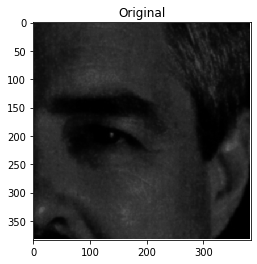

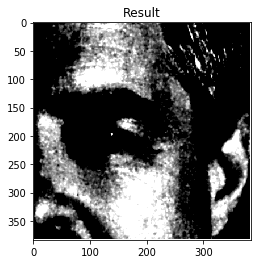

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def SimplestColorBalanceNVG(image,s):
    imageData=cv2.imread(image)/255
    imageData=np.mean(imageData,2)
    plt.imshow(imageData,"gray")
    plt.title('Original')
    plt.show()

    #Get the number of pixels
    pageSize = np.size(imageData,0) * np.size(imageData,1)    

    #Transforme the image into an array
    vecteur_nt=np.reshape(imageData,[pageSize,1])

    #Sort the array
    vecteur_t=np.sort(vecteur_nt);

    # Balance the %
    s1=s/2;
    s2=s1;

    #Get the position of the quantiles
    pos_v_min=np.floor(pageSize * s1 / 100).astype(int)
    pos_v_max=np.floor((pageSize * (1 - (s2/100))) - 1).astype(int)

    #Get the values of (quantiles)
    v_min=vecteur_t[pos_v_min]
    v_max=vecteur_t[pos_v_max]

    #Replace the values that are greater than v_max with v_max,
    # and those which are smaller than v_min with v_min
    idx_min=vecteur_nt<v_min
    idx_max=vecteur_nt>v_max
    vecteur_nt[idx_min]=v_min
    vecteur_nt[idx_max]=v_max

    #Normalisation
    #f(x) = (x - Vmin) × (max - min) / (Vmax - Vmin) + min.
    for i in range(pageSize):
        vecteur_nt[i]=((vecteur_nt[i]-v_min) * (255-0) )/((v_max-v_min) + 0 )

    #Reshape the result into a matrix
    resultat=np.reshape(vecteur_nt,imageData.shape);
    plt.imshow(resultat/255,"gray")
    plt.title('Result')
    plt.show()

SimplestColorBalanceNVG('input_1.png',s=3)


### Color

In [38]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np


# def SimplestColorBalanceRGB(image,s):
#     imageData=cv2.imread(image)/255
#     b,g,r=cv2.split(imageData)
#     imageData=cv2.merge((r,g,b))
# #     plt.imshow(imageData)
# #     plt.title('Original')
# #     plt.show()

#     pageSize = np.size(imageData,0) * np.size(imageData,1)    
#     vecteur_nt=np.reshape(imageData,(pageSize,np.size(imageData,2)))
#     vecteur_t=np.sort(vecteur_nt)

#     minimum=vecteur_t[0,:]
#     maximum=vecteur_t[pageSize-1,:]

#     # Balance the %
#     s1=s/2
#     s2=s1

#     pos_v_min=np.floor(pageSize * s1 / 100).astype(int)
#     pos_v_max=np.floor((pageSize * (1 - (s2/100))) - 1).astype(int)

#     v_min=vecteur_t[pos_v_min,:]
#     v_max=vecteur_t[pos_v_max,:]

#     idx_min_r=vecteur_nt[:,0]<v_min[0]
#     idx_min_g=vecteur_nt[:,1]<v_min[1]
#     idx_min_b=vecteur_nt[:,2]<v_min[2]

#     idx_max_r=vecteur_nt[:,0]>v_max[0]
#     idx_max_g=vecteur_nt[:,1]>v_max[1]
#     idx_max_b=vecteur_nt[:,2]>v_max[2]

#     vecteur_nt[idx_min_r,0]=v_min[0]
#     vecteur_nt[idx_min_g,1]=v_min[1]
#     vecteur_nt[idx_min_b,2]=v_min[2]

#     vecteur_nt[idx_max_r,0]=v_max[0]
#     vecteur_nt[idx_max_g,1]=v_max[1]
#     vecteur_nt[idx_max_b,2]=v_max[2]

#     #f(x) = (x - Vmin) × (max - min) / (Vmax - Vmin) + min.
#     for c in range(3):
#         for i in range(pageSize):
#             vecteur_nt[i,c]=((vecteur_nt[i,c]-v_min[c]) * (maximum[c] -minimum[c]) )/( (v_max[c]-v_min[c]) + minimum[c] )

#     result=np.reshape(vecteur_nt,imageData.shape)
#     plt.imshow(result)
#     plt.title('Result')
#     plt.show()

# image='input_2.jpg'
# for s in np.arange(1,20,0.5):
#     SimplestColorBalanceRGB(image,s)

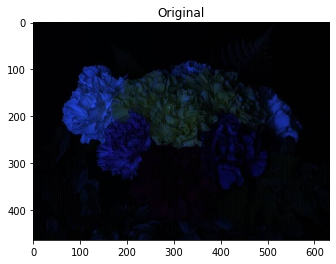

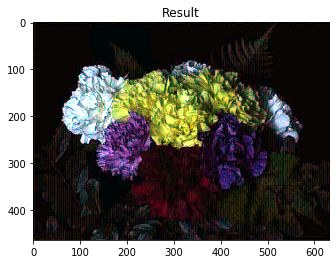

In [53]:
import numpy as np
import cv2


def apply_mask(matrix, mask, fill_value):
    masked = np.ma.array(matrix, mask=mask, fill_value=fill_value)
    return masked.filled()


def apply_threshold(matrix, low_value, high_value):
    low_mask = matrix < low_value
    matrix = apply_mask(matrix, low_mask, low_value)

    high_mask = matrix > high_value
    matrix = apply_mask(matrix, high_mask, high_value)

    return matrix


def SimplestColorBalance(img, percent):
    
    assert img.shape[2] == 3
    assert 0 <= percent <= 100

    half_percent = percent / 200

    channels = cv2.split(img)

    out_channels = []
    for channel in channels:
        assert len(channel.shape) == 2
        # find the low and high precentile values (based on the input percentile)
        height, width = channel.shape[:2]
        vec_size = width * height
        flat = channel.reshape(vec_size)

        assert len(flat.shape) == 1

        low_val = np.percentile(flat, half_percent * 100)
        high_val = np.percentile(flat, (1 - half_percent) * 100)

        # saturate below the low percentile and above the high percentile
        thresholded = apply_threshold(channel, low_val, high_val)

        # scale the channel
        normalized = cv2.normalize(thresholded, thresholded.copy(), 0, 255, cv2.NORM_MINMAX)
        out_channels.append(normalized)

    return cv2.merge(out_channels)

img=cv2.imread('input_2.jpg')
b,g,r=cv2.split(img)
img=cv2.merge((r,g,b))
plt.imshow(img)
plt.title('Original')
plt.show()
    
output=SimplestColorBalance(img, 3)
plt.imshow(output)
plt.title('Result')
plt.show()

## Screened Poisson Equation for Image Contrast Enhancement

In [92]:
def periodique( imageData ):
    [M,N]=imageData.shape
    img_prd=np.zeros((M*2,N*2))
    img_prd[:M,:N]=imageData
    img_prd[M:M*2,:N]=np.flipud(imageData)
    img_prd[:M,N:N*2]=np.fliplr(imageData)
    img_prd[M:M*2,N:N*2]=np.fliplr(np.flipud(imageData))
    
    return img_prd

/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
/home/sathvik/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


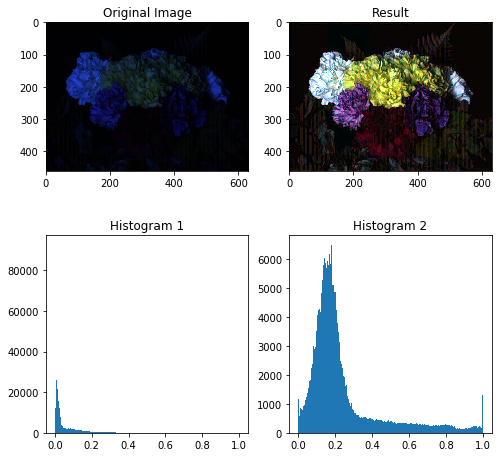

In [150]:

def Poisson(image,s,lambda_value):
    img=cv2.imread(image)
    b,g,r=cv2.split(img)
    imageData=cv2.merge((r,g,b))

    # blue,green,red=cv2.split(imageData)

    img_sat=SimplestColorBalance(imageData,s)
    img_sat_red,img_sat_green,img_sat_blue=cv2.split(img_sat)

    #Periodisation
    img_prd_red=periodique(img_sat_red)
    img_prd_green=periodique(img_sat_green)
    img_prd_blue=periodique(img_sat_blue)

    #Calcule des FFTs
    fft_img_red=(np.fft.fft2(img_prd_red))
    fft_img_green=(np.fft.fft2(img_prd_green))
    fft_img_blue=(np.fft.fft2(img_prd_blue))

    [J,L]=fft_img_red.shape
    fft_u_red=np.zeros((J,L))
    fft_u_green=np.zeros((J,L))
    fft_u_blue=np.zeros((J,L))


    #Application de la formule de poisson sur chaque canal
    for m in range(J):
        for n in range(L):
            fft_u_red[m,n]=(((np.pi*m/J)**2+(np.pi*n/L)**2)/(lambda_value+(np.pi*m/J)**2+(np.pi*n/L)**2))*fft_img_red[m,n]
            fft_u_green[m,n]=(((np.pi*m/J)**2+(np.pi*n/L)**2)/(lambda_value+(np.pi*m/J)**2+(np.pi*n/L)**2))*fft_img_green[m,n]
            fft_u_blue[m,n]=(((np.pi*m/J)**2+(np.pi*n/L)**2)/(lambda_value+(np.pi*m/J)**2+(np.pi*n/L)**2))*fft_img_blue[m,n]

    [M,N,L]=imageData.shape
    #calcule de l'inverse, prendre la partie réelle
    u_red=np.real(np.fft.ifft2(fft_u_red))
    u_green=np.real(np.fft.ifft2(fft_u_green))
    u_blue=np.real(np.fft.ifft2(fft_u_blue))

    #saturation
    img1=cv2.merge((u_red[:M,:N],u_green[:M,:N],u_blue[:M,:N]))
    result=SimplestColorBalance(img1,s)
    result=np.clip(result,0,255)
    
    plt.figure(figsize=(8,8)) 
    plt.subplot(2,2,1) 
    plt.imshow(imageData)
    plt.title('Original Image')
    plt.subplot(2,2,2)
    plt.imshow(output)
    plt.title('Result')
    plt.subplot(2,2,3)
    plt.hist((np.mean(imageData,2)/255).ravel(),256,[0,1])
    plt.title('Histogram 1')
    plt.subplot(2,2,4)
    plt.hist((np.mean(result,2)/255).ravel(),256,[0,1])
    plt.title('Histogram 2')
    plt.show()
    
image='input_2.jpg'
s=3
lambda_value=0.001
Poisson(image,s,lambda_value)

# Q2. Adaptive Median Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import pandas as pd

In [2]:
#function to add salt and pepper noise
def add_noise(img,noise_density): 
  
    # Getting the dimensions of the image 
    row , col = img.shape 
      
    number_of_pixels = row*col*noise_density/100
    for i in range(1,int(number_of_pixels/2)): 
        
        # Pick a random x,y coordinate 
        x_coord=random.randint(0, col - 1)
        y_coord=random.randint(0, row - 1) 
        # Color that pixel to white 
        img[y_coord][x_coord] = 255
          
    for i in range(1,int(number_of_pixels/2)): 
        
        # Pick a random x,y coordinate
        x_coord=random.randint(0, col - 1)
        y_coord=random.randint(0, row - 1)  
        # Color that pixel to black 
        img[y_coord][x_coord] = 0
          
    return img

#function to compute PSNR
def compute_psnr(i1,i2):
    mse = np.square(np.subtract(i1,i2)).mean()
    return 10*np.log10(255*255/mse)

#Function to pad an image
def padding(img,pad):
    padded_img = np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad))
    padded_img[pad:-pad,pad:-pad] = img
    return padded_img

#Filter an image using Adaptive Median Filter (AMF)
def AdaptiveMedianFilter(img,s=3,sMax=7):
    H,W = img.shape
    a = sMax//2
    padded_img = padding(img,a)
    #f_img = np.zeros(padded_img.shape)

    for i in range(a,H+a+1):
        for j in range(a,W+a+1):
            value = Lvl_A(padded_img,i,j,s,sMax)
            padded_img[i,j] = value

    return padded_img[a:-a,a:-a] 

#Level A of Adaptive median filter
def Lvl_A(mat,x,y,s,sMax):
    window = mat[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)

    if Zmin < Zmed < Zmax:
        return Lvl_B(window, Zmin, Zmed, Zmax)
    else:
        s += 2 
        if s <= sMax:
            return Lvl_A(mat,x,y,s,sMax)
        else:
             return Zmed

#Level B of Adaptive median filter
def Lvl_B(window, Zmin, Zmed, Zmax):
    h,w = window.shape

    Zxy = window[h//2,w//2]
    if Zmin < Zxy < Zmax:
        return Zxy
    else:
        return Zmed
    
#Filter an image using Decision Based Median Filtering(DBMF)
def DecisionBasedFilter(img,s=3):
    H,W = img.shape
    a = s//2
    padded_img = padding(img,a)
    #f_img = np.zeros(padded_img.shape)

    for i in range(a,H+a+1):
        for j in range(a,W+a+1):
            value = Step_DBF(padded_img,i,j,s)
            padded_img[i,j] = value

    return padded_img[a:-a,a:-a] 

# Step B for DBMF
def Step_DBF(mat,x,y,s):
    window = mat[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    Zmin = np.min(window)
    Zmed = np.median(window).astype(np.uint8)
    Zmax = np.max(window)
    Zxy = mat[x,y]

    if Zmin < Zxy < Zmax:
        return Zxy
    elif (Zmin < Zmed < Zmax) or (0<Zmed<255):
        return Zmed
    else:
        return mat[x-1,y]
    
#Filter an image using Adaptive Decision Based Median Filtering(ADBMF)    
def AdaptiveDecisionMedianFilter(img,s=3,sMax=7):
    H,W = img.shape
    a = sMax//2
    padded_img = padding(img,a)

    #f_img = np.zeros(padded_img.shape)

    for i in range(a,H+a+1):
        for j in range(a,W+a+1):
            value = Step_ADBF(padded_img,i,j,s,sMax)
            padded_img[i,j] = value

    return padded_img[a:-a,a:-a] 

# Step B for ADBMF
def Step_ADBF(mat,x,y,s,sMax):
    window = mat[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    Zmin = np.min(window)
    Zmed = np.median(window).astype(np.uint8)
    Zmax = np.max(window)
    Zxy = mat[x,y]

    if Zmin < Zxy < Zmax:
        return Zxy
    elif (Zmin < Zmed < Zmax) or (0<Zmed<255):
        return Zmed
    else:
        s += 2 
        if s <= sMax:
            return Step_ADBF(mat,x,y,s,sMax)
        else:
             return mat[x-1,y]





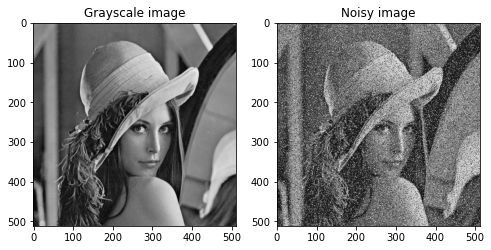

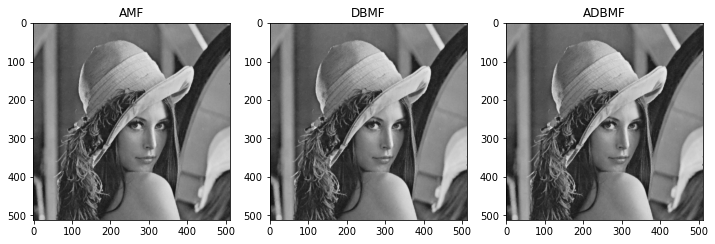

For Noise Density =  20 %
PSNR (AMF) =  34.04430994665024
PSNR (DBMF) =  34.174976646463364
PSNR (ADBMF) =  34.29213024107217


In [3]:
filter_size = 3
w_max = 11
noise_density = 20

i=cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE) 

#add noise
i_noisy = add_noise(i.copy(),noise_density)
f, axarr = plt.subplots(1,2,figsize=(8, 8))
axarr[0].imshow(i,"gray")
axarr[0].set_title("Grayscale image")
axarr[1].imshow(i_noisy,"gray")
axarr[1].set_title("Noisy image")
plt.show()

i_AMF = AdaptiveMedianFilter(i_noisy,filter_size,w_max)
i_DBMF = DecisionBasedFilter(i_noisy,filter_size)
i_ADBMF = AdaptiveDecisionMedianFilter(i_noisy,filter_size,w_max)

f, axarr = plt.subplots(1,3,figsize=(12, 12))
axarr[0].imshow(i_AMF,"gray")
axarr[0].set_title("AMF")
axarr[1].imshow(i_DBMF,"gray")
axarr[1].set_title("DBMF")
axarr[2].imshow(i_ADBMF,"gray")
axarr[2].set_title("ADBMF")
plt.show()

print("For Noise Density = ",noise_density,"%")
print("PSNR (AMF) = ",compute_psnr(i,i_AMF))
print("PSNR (DBMF) = ",compute_psnr(i,i_DBMF))
print("PSNR (ADBMF) = ",compute_psnr(i,i_ADBMF))


,AMF,DBMF,ADBMF
Noise Density,,,
5,34.078,34.101,34.172
10,33.445,33.097,33.531
20,31.703,31.842,32.074
30,30.164,30.544,30.445
40,28.045,29.051,29.182
50,26.570,27.703,28.216
60,25.108,26.623,27.216
70,23.877,25.294,25.664
80,23.437,24.699,25.133


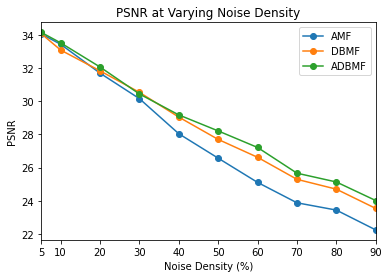

In [4]:
filter_size = 3
w_max = 11
noise_density = [5,10,20,30,40,50,60,70,80,90]
i=cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
i = cv2.resize(i,(256,256))

df_psnr = pd.DataFrame(index=noise_density,columns=['AMF','DBMF','ADBMF'])

for noise in noise_density:
    i_noisy = add_noise(i.copy(),noise)
    i_AMF = AdaptiveMedianFilter(i_noisy,filter_size,w_max)
    i_DBMF = DecisionBasedFilter(i_noisy,filter_size)
    i_ADBMF = AdaptiveDecisionMedianFilter(i_noisy,filter_size,w_max)
    df_psnr.at[noise,'AMF'] = compute_psnr(i,i_AMF)
    df_psnr.at[noise,'DBMF'] = compute_psnr(i,i_DBMF)
    df_psnr.at[noise,'ADBMF'] = compute_psnr(i,i_ADBMF)
    
display(df_psnr.astype(float).round(decimals=3).reset_index().rename(
         columns={'index':"Noise Density"}).set_index("Noise Density"))
df_psnr.plot(marker='o',xlabel="Noise Density (%)",ylabel="PSNR",xticks=df_psnr.index,
            xlim = (noise_density[0],noise_density[-1]),
            title="PSNR at Varying Noise Density")
plt.show()
    

# Q3. Implementation of the Fast Adaptive Histogram Equalization (AHE) Algorithm

In [1]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

In [2]:
#define window size
kernel_size = 8    #Must be a power of 2 to use the bitwise operation in Fast AHE
half=(int)(kernel_size/2)
kernel_area=(int)(kernel_size*kernel_size)
p=(int)(np.log2(kernel_area/256))

In [3]:
#input image
image = cv2.imread('lenna.tif',0)
#image padding with half kernel size on all sides
img = np.pad(image,((half,half),(half,half)),'reflect')

img_size=img.shape

In [4]:
img_trad_ahe=np.zeros_like(image)

In [5]:
t_slow_s=time.time()
for i in range(0,img_size[0]-kernel_size):
    for j in range(0,img_size[1]-kernel_size):
        
        #Slice a kernel from the image
        kernel = img[i:i+kernel_size,j:j+kernel_size]
        
        #Histogram Array
        hist=np.zeros(256)
        for k in range(0,kernel_size):
            for l in range(0,kernel_size):
                hist[kernel[k][l]]+=1
        
        #Cumulative Histogram
        chist=0
        for k in range(0,img[i][j]):
            chist+=hist[k]
        
        #Write into the output array
        img_trad_ahe[i,j] = int((chist * 256 )/(kernel_area))

#Calculate running time
t_slow_e=time.time()
t_slow=t_slow_e-t_slow_s
print("Time taken by traditional AHE: %0.2f s" % t_slow)

Time taken by traditional AHE: 35.95 s


In [6]:
img_fast_ahe=np.zeros_like(image)

In [7]:
hist=np.zeros(256)

#To store the histogram of the left most iteration, to be used when the iterator moves to the next row
hist_left=np.zeros(256)

In [8]:
t_fast_s=time.time()

for i in range(0,img.shape[0]-kernel_size):
    for j in range(0, img.shape[1]-kernel_size):
        if(j==0):
            if(i==0):                                 #Loop to calculate initial histogram
                for k in range(0,kernel_size):
                    for l in range(0,kernel_size):
                        hist[img[k][l]]+=1
                chist=0
                for k in range(0,img[0][0]):
                    chist+=hist[k]
                hist_left=hist.copy()                 #Stored in hist_left
            else:
                hist=hist_left.copy()                 #Loaded from hist_left, for subsequent row beginnings
                for k in range(0,kernel_size):        #Loop to move kernel down
                    hist[img[i-1][k]]-=1      
                    hist[img[i+kernel_size-1][k]]+=1
                hist_left=hist.copy()
                
        else:
            for k in range(i,i+kernel_size):          #Normal iteration loop to move kernel right
                hist[img[k][j-1]]-=1
                hist[img[k][j+kernel_size-1]]+=1
                
                
        chist=0                                       #Accumulation in hist is done from the nearer end to the pixel       
        if(img[i][j]<=256/2):
            for k in range(0,img[i][j]):
                chist+=hist[k]
        else:
            chist=kernel_area
            for k in range(img[i][j],256):
                chist-=hist[k]
        chist=(int)(chist)
        
        
        if(p>=0):                                     #Kernel Area is a power of 2, hence bitwise operators
            img_fast_ahe[i,j]=chist>>p                #can be used instead of multiplication or division
        else:
            img_fast_ahe[i,j]=chist<<(-p)
            
t_fast_e=time.time()
t_fast=t_fast_e-t_fast_s
print("Time taken by Fast AHE: %0.2f s" % t_fast)
t_diff=t_slow-t_fast
t_gain=t_slow/t_fast
print("Difference = %0.2f" % t_diff)
print("Fast AHE is %0.2f times faster than traditional AHE for this image" % t_gain)

Time taken by Fast AHE: 16.81 s
Difference = 19.14
Fast AHE is 2.14 times faster than traditional AHE for this image


Original Image

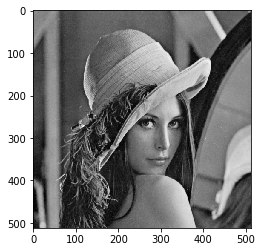

In [10]:
plt.imshow(image,cmap='gray')
plt.show()

Image from Traditional AHE

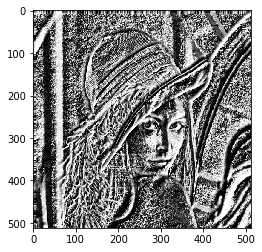

In [11]:

plt.imshow(img_trad_ahe,cmap='gray')
plt.show()

Image from Fast AHE

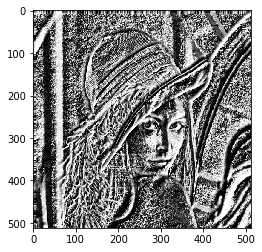

In [12]:
plt.imshow(img_fast_ahe,cmap='gray')
plt.show()

In [13]:
(img_fast_ahe==img_trad_ahe).all()

True

Both methods produce the same output.